<a href="https://colab.research.google.com/github/vamsyvijay/OIBSIP/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement


*   We have seen a sharp increase in the unemployment rate after the covid-19. So analysing the unemployment rate would be a beneficial thing to focus on furthur proceedings and understandings.




#Importing the required libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Load the Data

In [ ]:
df1 = pd.read_csv("/content/Unemployment in India.csv")
df2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Let' Analyze the first dataset (df1)


In [ ]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
# We can observe that the columns names of the dataset have speces before the actual name
# so we should remove the unwanted spaces and then rename the column names as per our convenience

unspaced_column_names =[i.strip() for i in df1.columns]
unspaced_column_names

['Region',
 'Date',
 'Frequency',
 'Estimated Unemployment Rate (%)',
 'Estimated Employed',
 'Estimated Labour Participation Rate (%)',
 'Area']

In [ ]:
df1.columns = unspaced_column_names
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
#Rename the column names as per our convenience
df1 = df1.rename({'Estimated Unemployment Rate (%)':'EUR','Estimated Employed':'Estimated_Employed','Estimated Labour Participation Rate (%)':"ELPR"},axis=1)

In [ ]:
df1.head()

,Region,Date,Frequency,EUR,Estimated_Employed,ELPR,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df1['Date'] = pd.to_datetime(df1["Date"])

In [ ]:
df1['month'] = df1['Date'].dt.month

In [ ]:
df1['year'] = df1['Date'].dt.year

In [ ]:
df1.head()

,Region,Date,Frequency,EUR,Estimated_Employed,ELPR,Area,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0,2019.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0,2019.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0,2019.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0,2019.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0,2019.0


In [ ]:
df1.isna().value_counts()

Region  Date   Frequency  EUR    Estimated_Employed  ELPR   Area   month  year 
False   False  False      False  False               False  False  False  False    740
True    True   True       True   True                True   True   True   True      28
dtype: int64

In [ ]:
df1.dropna(inplace =True)

In [ ]:
df1.isna().value_counts()

Region  Date   Frequency  EUR    Estimated_Employed  ELPR   Area   month  year 
False   False  False      False  False               False  False  False  False    740
dtype: int64

# Exploratory Data Analysis

In [ ]:
df1['year'] = df1['year'].round().astype(int)
df1['month'] = df1['month'].round().astype(int)

In [ ]:
df1.head()

,Region,Date,Frequency,EUR,Estimated_Employed,ELPR,Area,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Region              740 non-null    object        
 1   Date                740 non-null    datetime64[ns]
 2   Frequency           740 non-null    object        
 3   EUR                 740 non-null    float64       
 4   Estimated_Employed  740 non-null    float64       
 5   ELPR                740 non-null    float64       
 6   Area                740 non-null    object        
 7   month               740 non-null    int64         
 8   year                740 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 57.8+ KB


In [ ]:
df1.describe()

,EUR,Estimated_Employed,ELPR,month,year
count,740.000000,7.400000e+02,740.000000,740.000000,740.000000
mean,11.787946,7.204460e+06,42.630122,6.390541,2019.418919
std,10.721298,8.087988e+06,8.111094,3.235070,0.493716
min,0.000000,4.942000e+04,13.330000,1.000000,2019.000000
25%,4.657500,1.190404e+06,38.062500,4.000000,2019.000000
50%,8.350000,4.744178e+06,41.160000,6.000000,2019.000000
75%,15.887500,1.127549e+07,45.505000,9.000000,2020.000000
max,76.740000,4.577751e+07,72.570000,12.000000,2020.000000


In [ ]:
df1.drop('Frequency',axis=1,inplace=True)

In [ ]:
df1.isna().sum()

Region                0
Date                  0
EUR                   0
Estimated_Employed    0
ELPR                  0
Area                  0
month                 0
year                  0
dtype: int64

# Data Visualization


In [ ]:
px.line(df1.sort_values(by='Date'),x='Date',y=['EUR'])

In [ ]:
px.line(df1.sort_values(by='Date'),x='Date',y=['ELPR'])


In [ ]:
px.scatter(df1,x='EUR',y='month')
#here we'll get to know the distribution of EUR(estimated unemployment rate) in every month
# we can have an obsevation that there is a spike of eur in month 4 and 5

<ipython-input-117-53f64e773a37>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

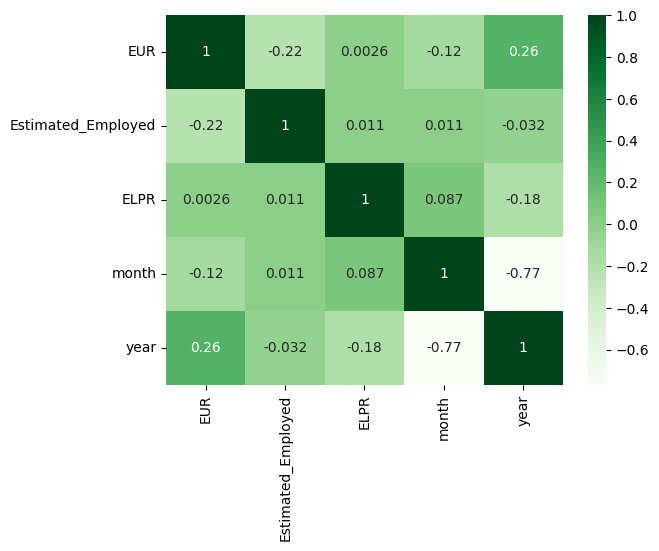

In [ ]:
sns.heatmap(df1.corr(),annot=True,cmap='Greens')
# Let's find that if there is any correlation between the numerical data with in the dataset

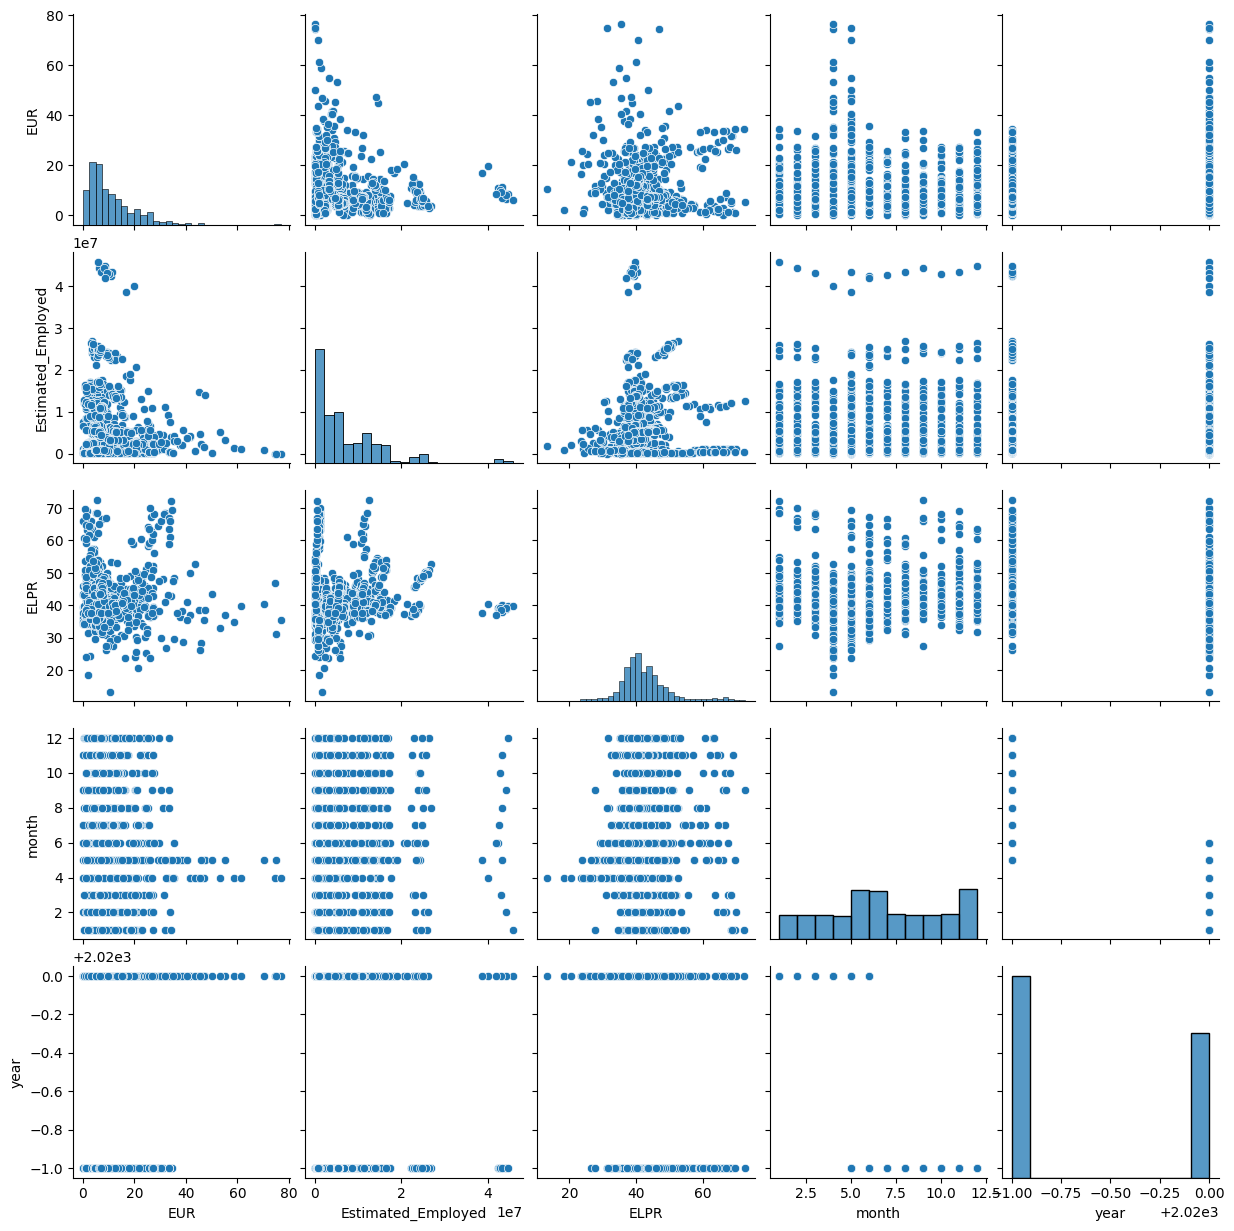

In [ ]:
# let's have a look at every pair plot through scatter plot distribution and bar plot
sns.pairplot(df1)

In [ ]:
px.line(df1,x='month',y='EUR',color='Area',markers=True,symbol='year')
#here we'll get to know the distribution of EUR(estimated unemployment rate) in every month
# we can have an obsevation that there is a spike of eur in month 4 and 5 even the rural and urban areas

In [ ]:
px.histogram(df1,x='Area',y=['EUR','ELPR'])

In [ ]:
df1.head()

,Region,Date,EUR,Estimated_Employed,ELPR,Area,month,year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,9,2019


In [ ]:
px.histogram(df1,x='Region',y=['EUR','ELPR'])
# by this histrogram we can get to know the EUR and ELPR of different states


In [ ]:
fig=px.pie(df1,names='Region',values='EUR')
fig.show()
# By this pie chart we get to know how much percent of EUR is present in every state
# By the chart we can get to know that the Tripura is holding the Highest EUR among all states

# AUTO VISUALIZATION


*   Since the visualization part takes much time, we use autoviz library to visualize and understand the every parameter in detail for another dataset




In [ ]:
!pip install autoviz

In [ ]:
%matplotlib inline

Shape of your Data Set loaded: (267, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    9 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
Number of All Scatter Plots = 10


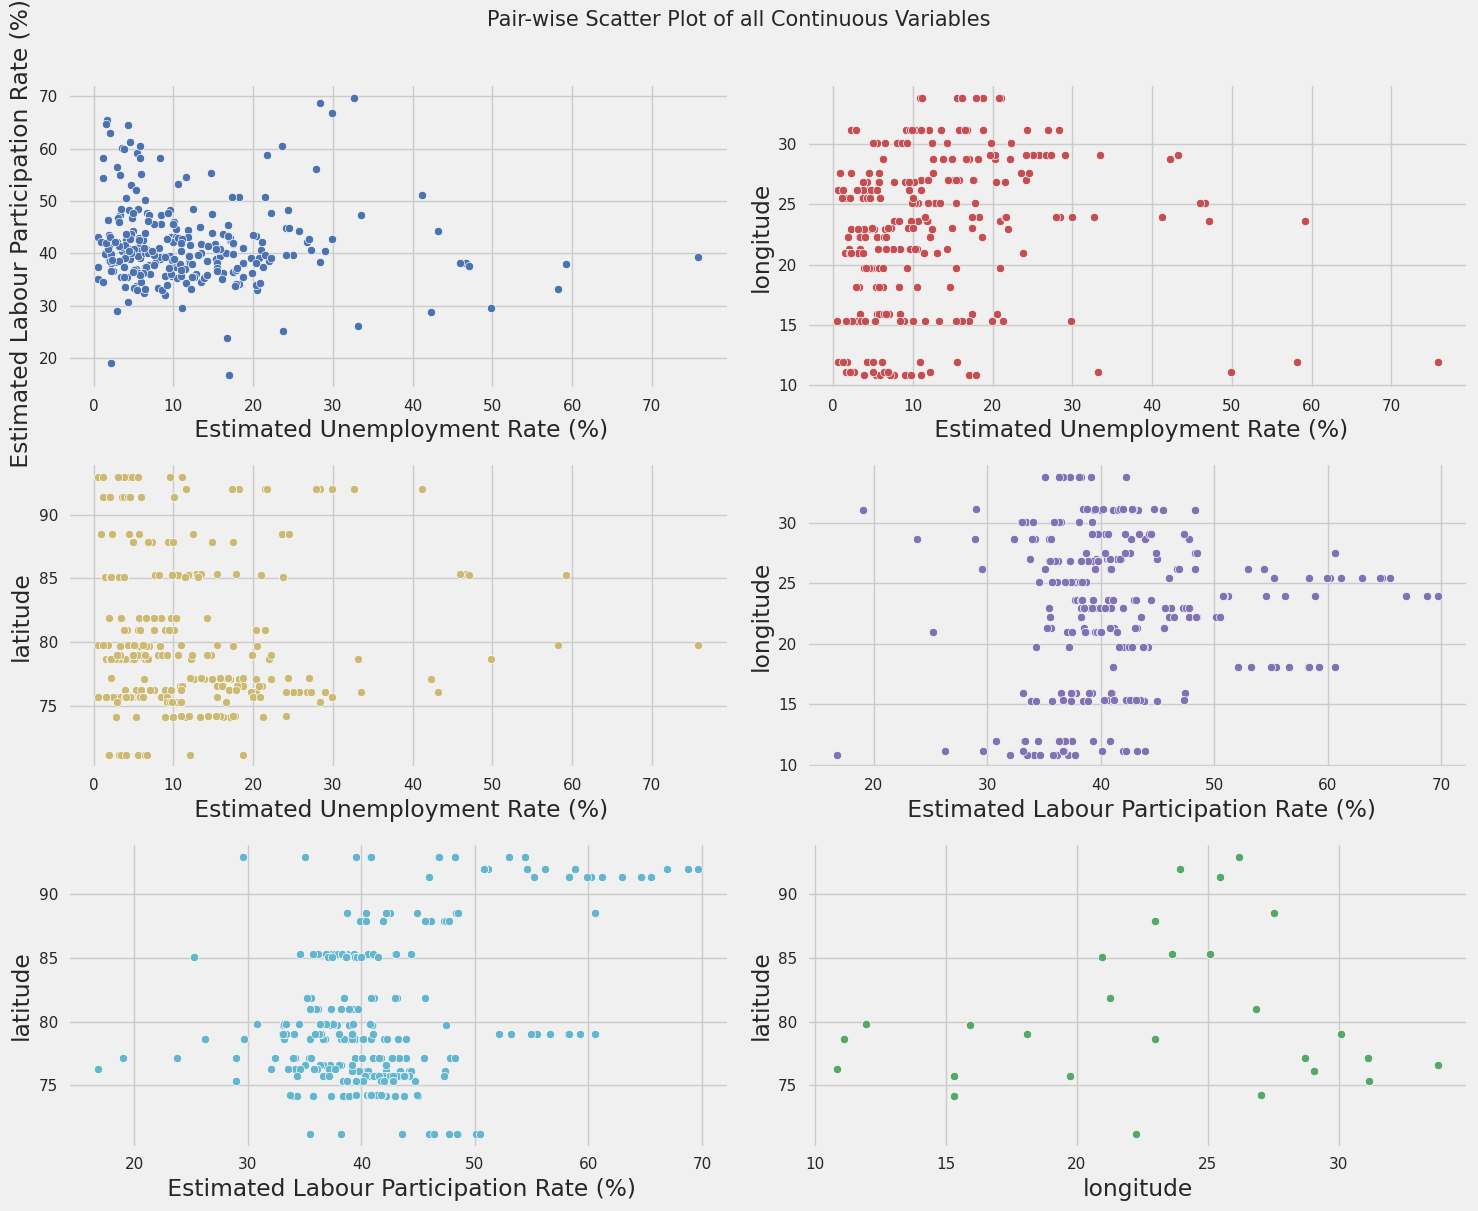

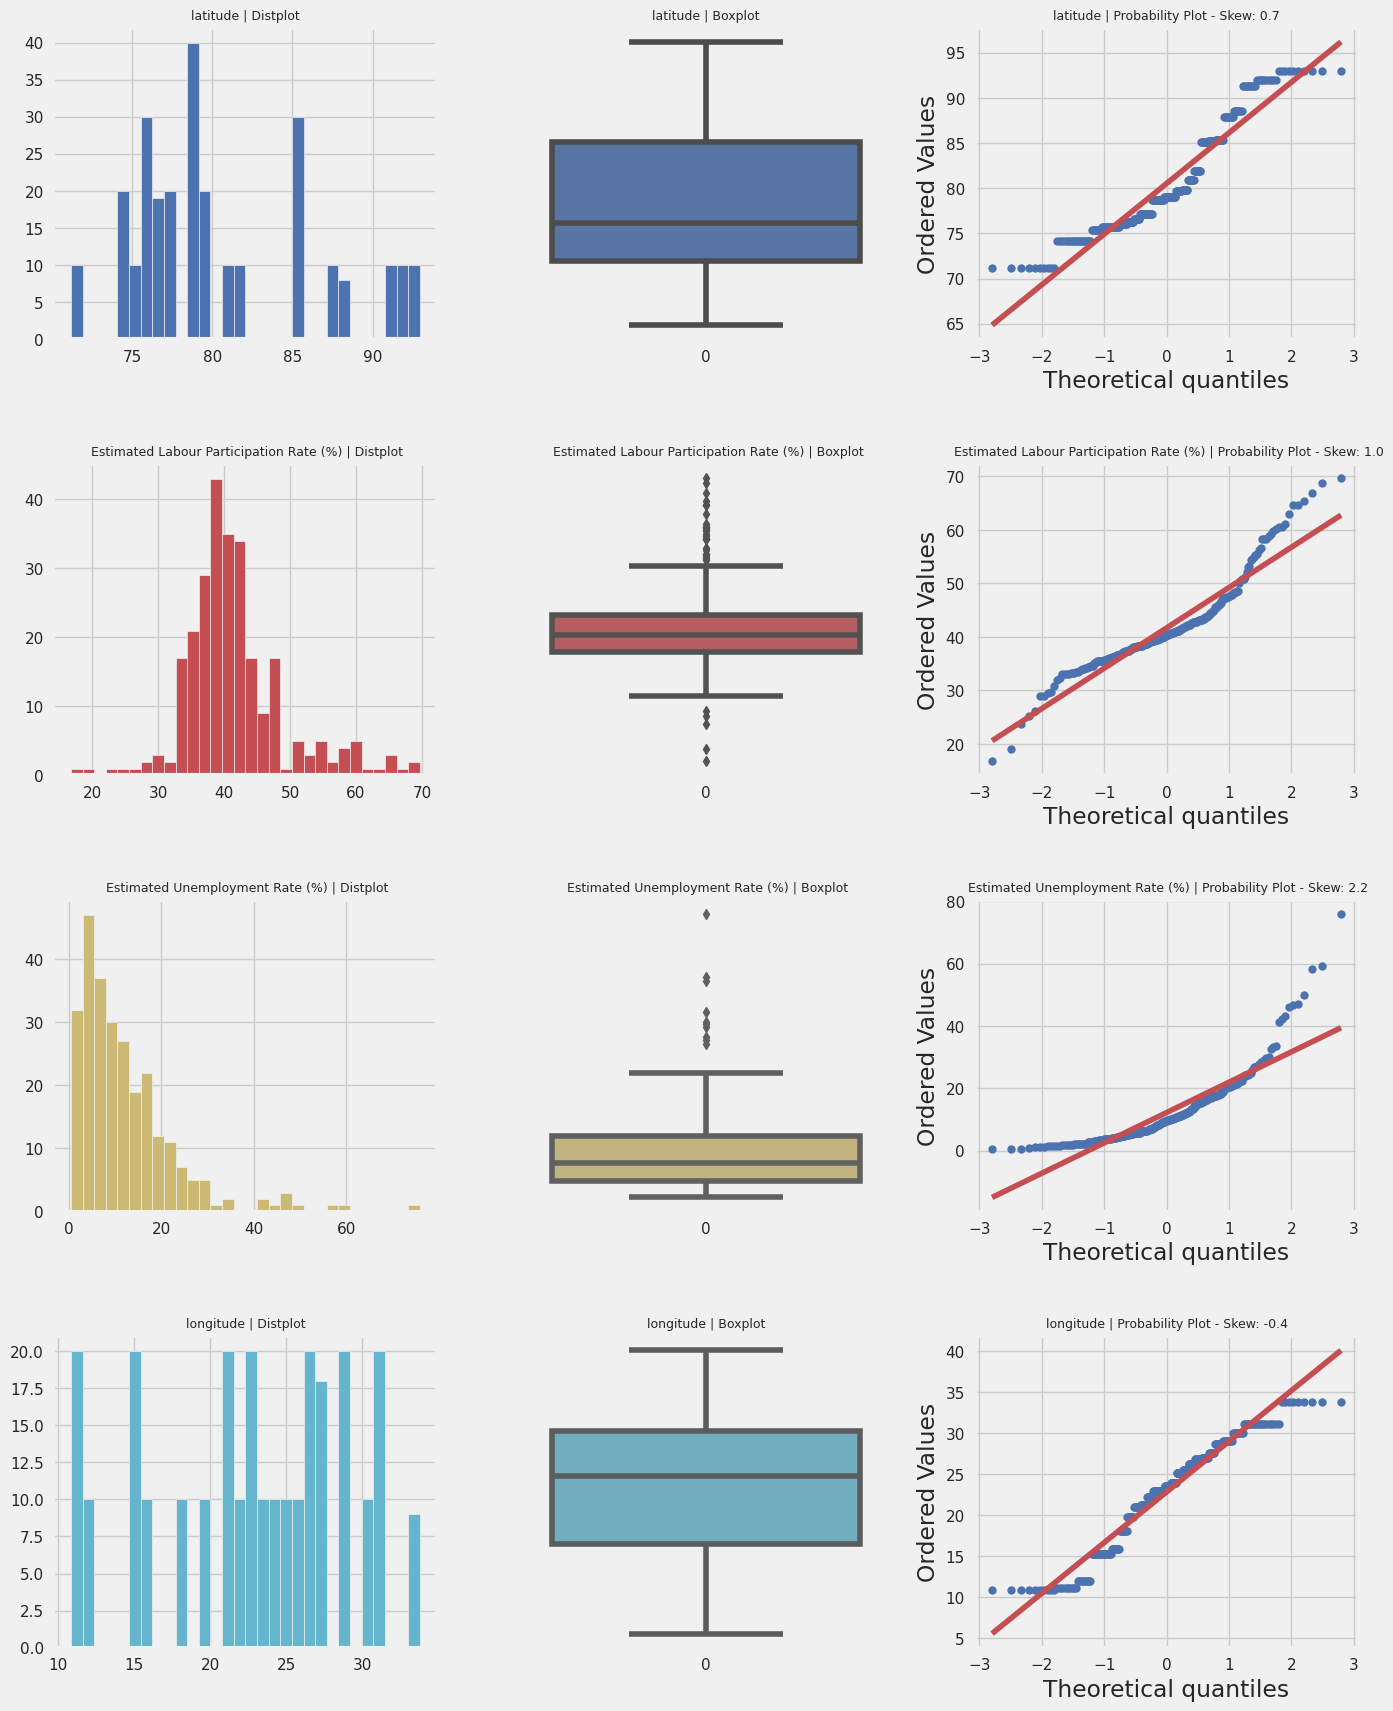

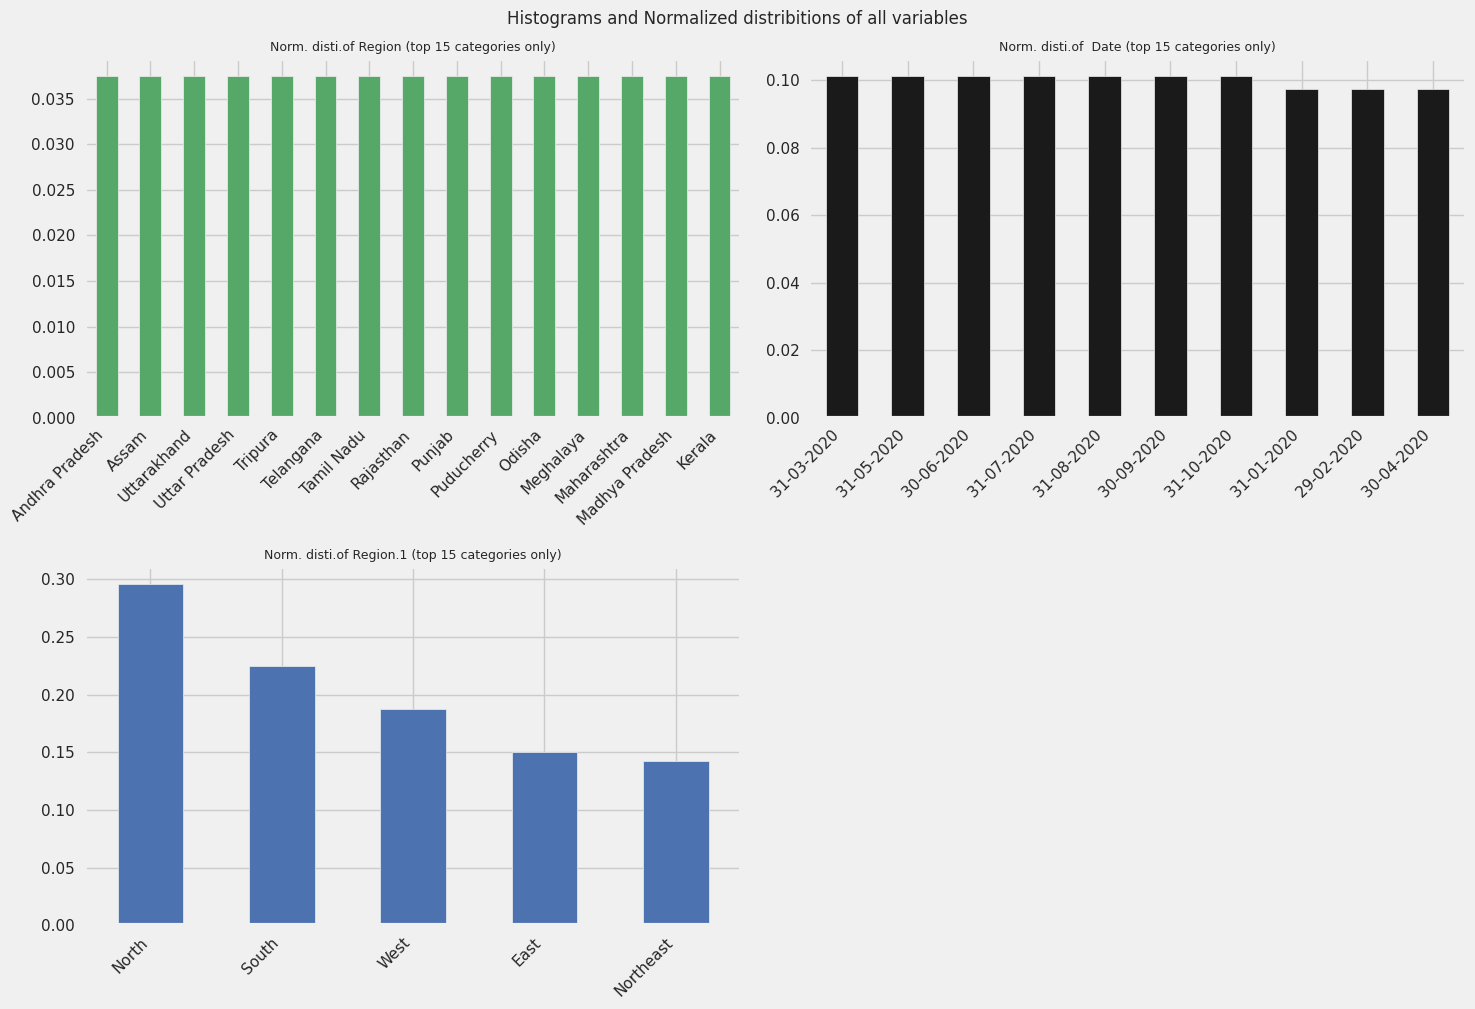

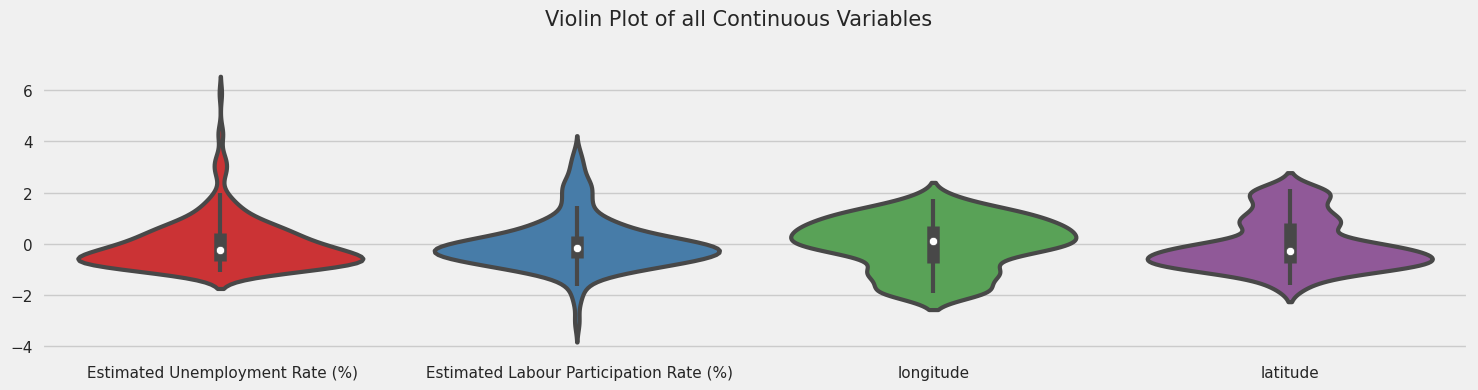

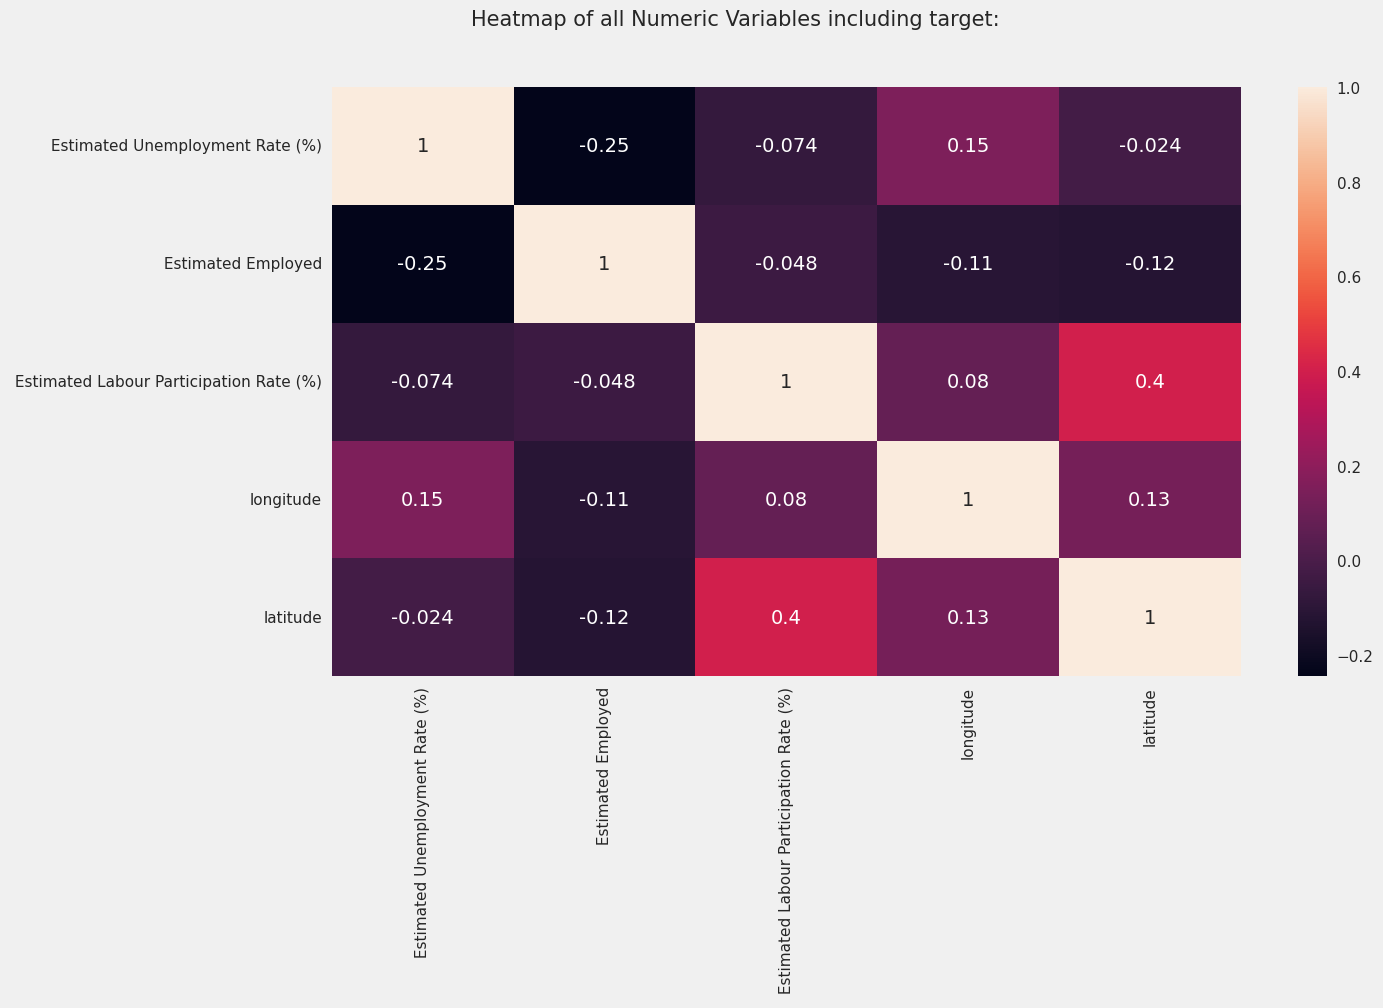

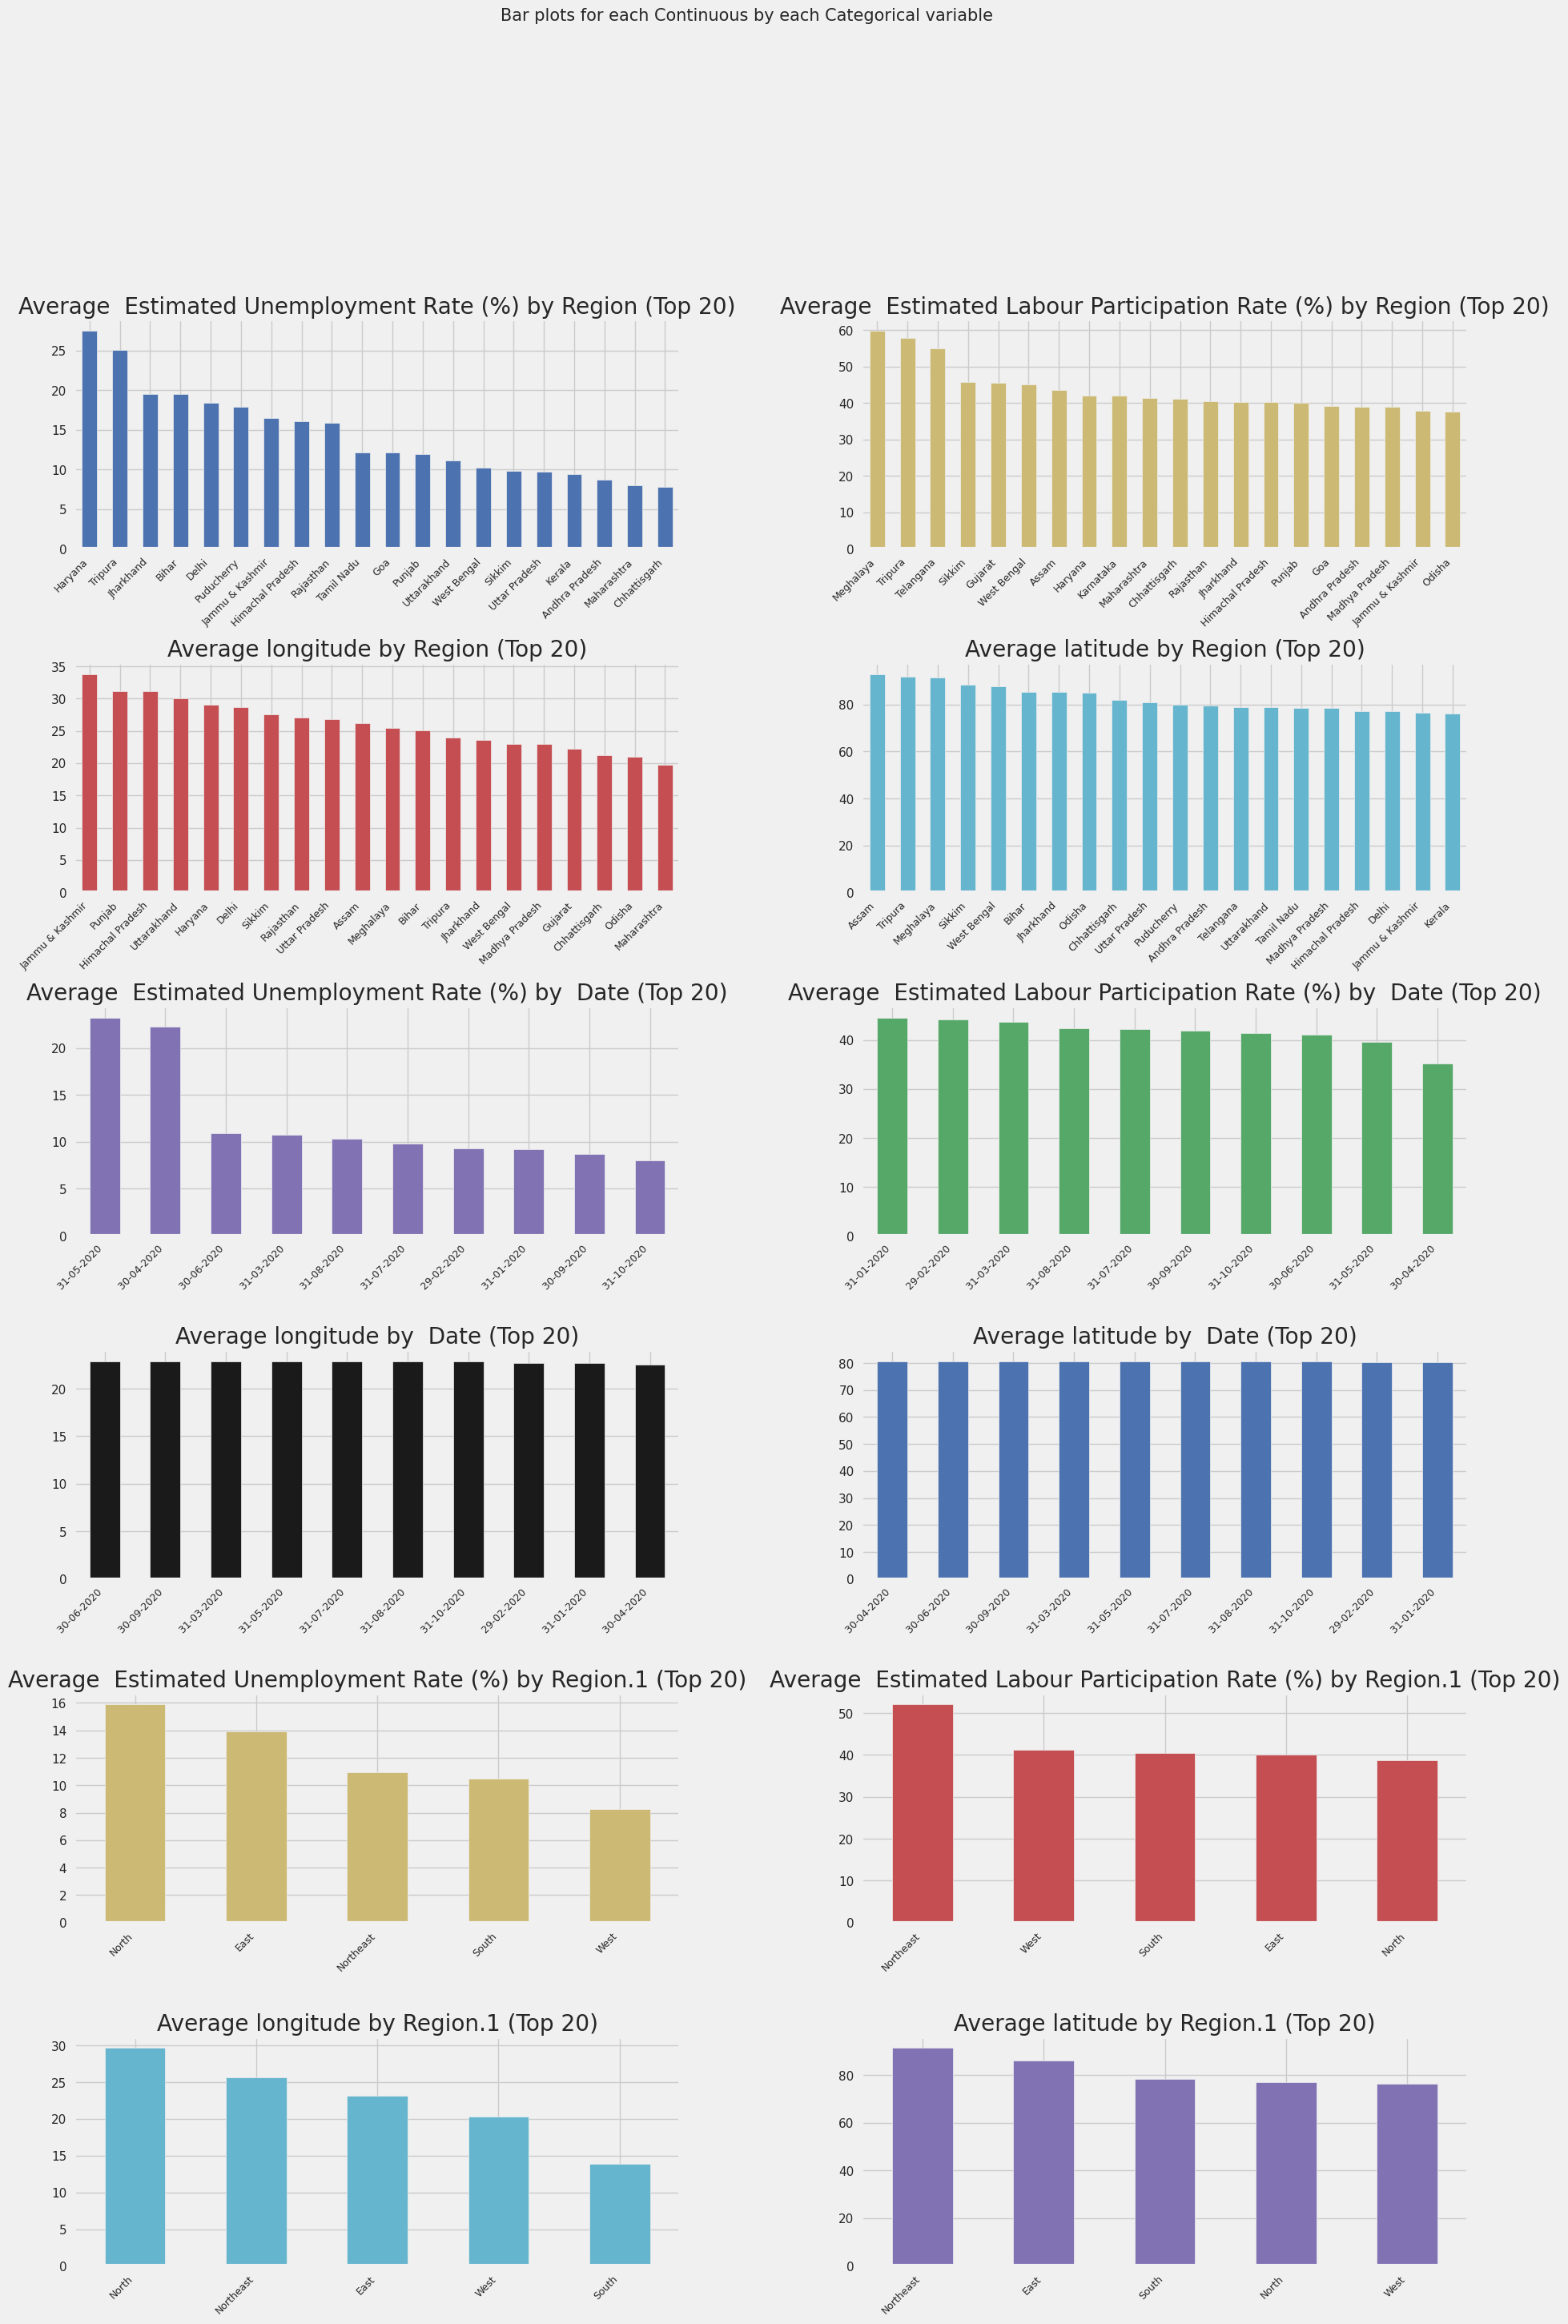

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
df = AV.AutoViz(
    filename="/content/Unemployment_Rate_upto_11_2020.csv",
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)
